<a href="https://colab.research.google.com/github/jmross0108/jmross0108/blob/main/Inmates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests 
!pip install sodapy
from sodapy import Socrata

Read in Data retrieved with the API endpoint from data.texas.gov

In [ ]:
url = 'https://data.texas.gov/resource/cg6t-bapy.json'
r = requests.get(url)
r

<Response [200]>

In [ ]:
json = r.json()
inmates = pd.DataFrame(json)
inmates.head()

,sid_number,tdcj_number,name,current_facility,gender,race,age,projected_release,maximum_sentence_date,parole_eligibility_date,case_number,county,offense_code,tdcj_offense,sentence_date,offense_date,sentence_years,last_parole_decision,next_parole_review_date,parole_review_status
0,00524524,00758486,"HARPER,DAVID JOHN JR",Estelle,M,W,93,9999-01-01T00:00:00.000,9999-01-01T00:00:00.000,2026-08-03T00:00:00.000,95-765-C,McLennan,11180000,AGG SEXUAL ASSAULT,1996-08-13T00:00:00.000,1995-09-15T00:00:00.000,Life,None,08/03/2026,NOT IN REVIEW PROCESS
1,00703267,00841623,"RODRIGUEZ,THEODORE",Hospital Galveston,M,W,84,2022-03-01T00:00:00.000,2043-08-03T00:00:00.000,2021-02-01T00:00:00.000,97-396-C,McLennan,11990003,AGG SEX ASLT,1998-08-05T00:00:00.000,1996-06-01T00:00:00.000,45.0,Approved on 08/18/2021,N/A,NOT IN REVIEW PROCESS
2,00770626,00449674,"FLORES,ISABEL",Pack,M,H,84,9999-01-01T00:00:00.000,9999-01-01T00:00:00.000,2006-09-02T00:00:00.000,86CR-1234-B,Nueces,09150000,MURDER W/DEADLY WPN,1987-04-13T00:00:00.000,1986-09-02T00:00:00.000,Life,Denied on 07/21/2021,07/2024,NOT IN REVIEW PROCESS
3,00771601,01491019,"MOLETT,JOHN HENRY",W. Scott,M,B,79,2037-12-02T00:00:00.000,2037-12-02T00:00:00.000,2022-12-02T00:00:00.000,1144294,Harris,12990002,AGG ROBBERY W/DW,2008-02-21T00:00:00.000,2007-12-03T00:00:00.000,30.0,None,12/02/2022,NOT IN REVIEW PROCESS
4,00779423,01241039,"CARAWAY,LEON JR",C.T. Terrell,M,B,84,2023-06-19T00:00:00.000,2023-06-19T00:00:00.000,2013-06-18T00:00:00.000,"04CR-16,149",Shelby,11990003,AGG SEXUAL ALST,2004-05-13T00:00:00.000,1999-07-24T00:00:00.000,20.0,Denied on 10/30/2019,09/2022,NOT IN REVIEW PROCESS


We have successfully loaded our Dataframe into our notebook, now let's explore it a little bit so we can begin to get an idea of what the data looks like

In [ ]:
inmates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sid_number               1000 non-null   object
 1   tdcj_number              1000 non-null   object
 2   name                     1000 non-null   object
 3   current_facility         1000 non-null   object
 4   gender                   1000 non-null   object
 5   race                     1000 non-null   object
 6   age                      1000 non-null   object
 7   projected_release        1000 non-null   object
 8   maximum_sentence_date    1000 non-null   object
 9   parole_eligibility_date  974 non-null    object
 10  case_number              1000 non-null   object
 11  county                   1000 non-null   object
 12  offense_code             1000 non-null   object
 13  tdcj_offense             1000 non-null   object
 14  sentence_date            1000 non-null   

Because the website only allows a certain number of requests we were only able to retrieve the first 1000 entries of the data. I have locally downloaded the csv file of the dataset. Although this may take more time to execute. We will try working with the full dataset first and can always come back to this one retrieved from the API, So long as the entries are randomly sorted. We can find that out by digging through the full dataset.

## Load and Clean the Data

In [ ]:
from google.colab import files
uploaded = files.upload() # upload method of files object


Saving High_Value_Dataset__February_2022.csv to High_Value_Dataset__February_2022.csv


In [ ]:
import io
prisoners = pd.read_csv(io.BytesIO(uploaded['High_Value_Dataset__February_2022.csv']))

In [ ]:
prisoners.head()

,SID Number,TDCJ Number,Name,Current Facility,Gender,Race,Age,Projected Release,Maximum Sentence Date,Parole Eligibility Date,Case Number,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),Last Parole Decision,Next Parole Review Date,Parole Review Status
0,524524,758486,"HARPER,DAVID JOHN JR",Estelle,M,W,93,1/1/9999,1/1/9999,8/3/2026,95-765-C,McLennan,11180000,AGG SEXUAL ASSAULT,8/13/1996,9/15/1995,Life,None,8/3/2026,NOT IN REVIEW PROCESS
1,703267,841623,"RODRIGUEZ,THEODORE",Hospital Galveston,M,W,84,3/1/2022,8/3/2043,2/1/2021,97-396-C,McLennan,11990003,AGG SEX ASLT,8/5/1998,6/1/1996,45,Approved on 08/18/2021,NaN,NOT IN REVIEW PROCESS
2,770626,449674,"FLORES,ISABEL",Pack,M,H,84,1/1/9999,1/1/9999,9/2/2006,86CR-1234-B,Nueces,9150000,MURDER W/DEADLY WPN,4/13/1987,9/2/1986,Life,Denied on 07/21/2021,Jul-24,NOT IN REVIEW PROCESS
3,771601,1491019,"MOLETT,JOHN HENRY",W. Scott,M,B,79,12/2/2037,12/2/2037,12/2/2022,1144294,Harris,12990002,AGG ROBBERY W/DW,2/21/2008,12/3/2007,30,None,12/2/2022,NOT IN REVIEW PROCESS
4,779423,1241039,"CARAWAY,LEON JR",C.T. Terrell,M,B,84,6/19/2023,6/19/2023,6/18/2013,"04CR-16,149",Shelby,11990003,AGG SEXUAL ALST,5/13/2004,7/24/1999,20,Denied on 10/30/2019,Sep-22,NOT IN REVIEW PROCESS


In [ ]:
prisoners.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SID Number,118277.0,1.196195e+07,1.401051e+07,524524.0,5234234.0,6867952.0,8655362.0,96414913.0
TDCJ Number,118277.0,1.979011e+06,4.922929e+05,577.0,1798464.0,2197728.0,2334998.0,2380836.0
Age,118277.0,4.091260e+01,1.244702e+01,16.0,31.0,39.0,49.0,93.0
Offense Code,118277.0,2.356433e+07,1.559207e+07,9000001.0,11990004.0,13150011.0,35990014.0,73991073.0


The only useful information here is the IQR for age, as the other numbers are arbitrary. 75% of all the inmates fall within the ages of 31 and 49

In [ ]:
prisoners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118277 entries, 0 to 118276
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   SID Number               118277 non-null  int64 
 1   TDCJ Number              118277 non-null  int64 
 2   Name                     118277 non-null  object
 3   Current Facility         118277 non-null  object
 4   Gender                   118277 non-null  object
 5   Race                     118277 non-null  object
 6   Age                      118277 non-null  int64 
 7   Projected Release        118268 non-null  object
 8   Maximum Sentence Date    117727 non-null  object
 9   Parole Eligibility Date  107871 non-null  object
 10  Case Number              118254 non-null  object
 11  County                   118277 non-null  object
 12  Offense Code             118277 non-null  int64 
 13  TDCJ Offense             118277 non-null  object
 14  Sentence Date       

Because the target variable is sentence (Years), we won't be concerned with parole information, meaning we can get rid of the variables: 'Parole Eligibility Date', 'Last Parole Decision', 'Next Parole Review Date', 'Maximum Sentence Date', 'Projected Release' and 'Parole Review Status'.

In [ ]:
prisoners.drop(['Parole Eligibility Date', 'Last Parole Decision', 'Next Parole Review Date', 'Maximum Sentence Date', 
                'Projected Release','Parole Review Status','Name','SID Number','TDCJ Number','Case Number'],axis=1,inplace=True)

Convert dates stored as strings into Datetimes

In [ ]:
prisoners['Sentence Date'] = pd.to_datetime(prisoners['Sentence Date'],errors='coerce',format='%m/%d/%Y')
prisoners['Offense Date'] = pd.to_datetime(prisoners['Offense Date'],errors='coerce',format='%m/%d/%Y')

Now we have our dataset which consists of 1 target variable and 9 descriptive variables. 
Because Life is listed as a sentence we need to find a way to replace 'Life' with an integer that does not corrupt the data.

In [ ]:
len(prisoners[prisoners['Sentence (Years)'] == 'Life']) + len(prisoners[prisoners['Sentence (Years)'] == 'Capital Life'])

7835

In [ ]:
prisoners = prisoners[prisoners['Sentence (Years)'] != 'Life']
prisoners = prisoners[prisoners['Sentence (Years)'] != 'Capital Life']
prisoners = prisoners[prisoners['Sentence (Years)'] != 'Death']
prisoners = prisoners[prisoners['Sentence (Years)'] != 'LWOP']

In [ ]:
prisoners['Sentence (Years)'] = prisoners['Sentence (Years)'].astype(float)

There seem to be about 2,500 entries with missing values under the column 'Sentence Date'. Because none of the other columns have missing values, and because it is an insignificant number of missing values relative to the size of the dataset it is safe to remove those entries from the dataframe.

In [ ]:
prisoners.dropna(inplace=True)
prisoners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106344 entries, 1 to 118274
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Current Facility  106344 non-null  object        
 1   Gender            106344 non-null  object        
 2   Race              106344 non-null  object        
 3   Age               106344 non-null  int64         
 4   County            106344 non-null  object        
 5   Offense Code      106344 non-null  int64         
 6   TDCJ Offense      106344 non-null  object        
 7   Sentence Date     106344 non-null  datetime64[ns]
 8   Offense Date      106344 non-null  datetime64[ns]
 9   Sentence (Years)  106344 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 8.9+ MB


## Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


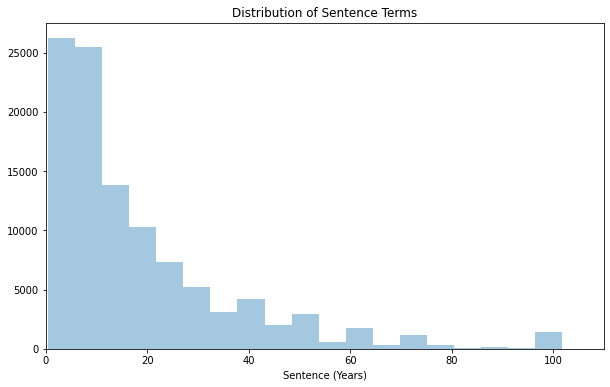

In [ ]:
plt.figure(figsize=(10,6))
plt.xlim(0,110)
plt.title('Distribution of Sentence Terms')
sns.distplot(prisoners['Sentence (Years)'],bins=150,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


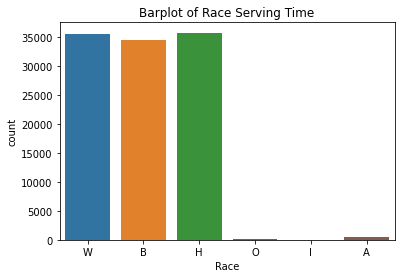

In [ ]:
plt.title('Barplot of Race Serving Time')
sns.countplot(prisoners['Race'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


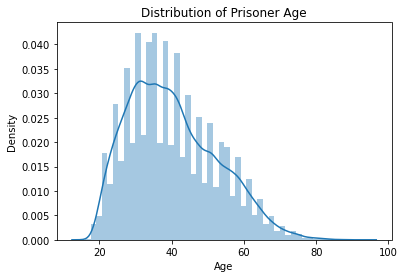

In [ ]:
plt.title('Distribution of Prisoner Age')
sns.distplot(prisoners['Age'])

There is a slight skew to the age distribution, however, this seems mostly due to several outliers, likely serving life sentences.

In [ ]:
prisoners['Offense Code'].nunique()

702

In [ ]:
prisoners['Current Facility'].nunique()

101

In [ ]:
county_mean = prisoners.groupby('County',as_index = False)['Sentence (Years)'].mean()
county_mean.sort_values(by='Sentence (Years)',ascending=False)

,County,Sentence (Years)
121,Jeff Davis,36.500000
22,Briscoe,33.333333
53,Crosby,31.916667
16,Borden,30.600000
54,Culberson,30.000000
...,...,...
39,Cochran,7.870000
130,Kenedy,7.454545
86,Glasscock,5.950000
214,Stonewall,5.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


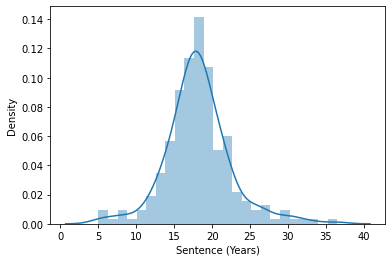

In [ ]:
sns.distplot(county_mean['Sentence (Years)'])

In [ ]:
prisoners['Sentence (Years)'].mean()

18.672647257955152

In [ ]:
race_mean = prisoners.groupby('Race',as_index = False)['Sentence (Years)'].mean()
race_mean.sort_values(by='Sentence (Years)',ascending=False)

,Race,Sentence (Years)
4,O,28.852294
3,I,22.181818
1,B,20.549486
5,W,18.193405
0,A,17.948529
2,H,17.314316


In [ ]:
prisoners['Race'].value_counts()

H    35807
W    35510
B    34466
A      408
O      109
I       44
Name: Race, dtype: int64

Sentences are being served in 101 different prisons.

## Feature Engineering

In [ ]:
# get the list of counties
counties = np.unique(prisoners['County'])

We will map the county variable to a numeric value using scikit learn label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
county_labels = gle.fit_transform(prisoners['County'])
county_mappings = {index: label for index, label in enumerate(gle.classes_)}

In [ ]:
prisoners['County Labels'] = county_labels

We can do the same for Current Facility

In [ ]:
# get list of Current Facility
facility = np.unique(prisoners['Current Facility'])

In [ ]:
facility_labels = gle.fit_transform(prisoners['Current Facility'])
facility_mappings = {index: label for index, label in enumerate(gle.classes_)}

In [ ]:
prisoners['Facility Labels'] = facility_labels

In [ ]:
prisoners.head()

,Current Facility,Gender,Race,Age,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),County Labels,Facility Labels
1,Hospital Galveston,M,W,84,McLennan,11990003,AGG SEX ASLT,1998-08-05,1996-06-01,45.0,158,47
3,W. Scott,M,B,79,Harris,12990002,AGG ROBBERY W/DW,2008-02-21,2007-12-03,30.0,100,92
4,C.T. Terrell,M,B,84,Shelby,11990003,AGG SEXUAL ALST,2004-05-13,1999-07-24,20.0,207,10
6,Pack,M,H,83,Tom Green,36120005,FAIL REG AS SEX OFFENDER,2003-08-15,2003-04-08,20.0,223,72
7,Beto,M,W,83,Montgomery,54040011,DWI 3RD/M,2011-07-20,2009-09-01,55.0,167,3


Both of these columns mapping the nominal data to numerical data have been added to the dataframe.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
gender = pd.get_dummies(prisoners.Gender)

In [ ]:
prisoners = prisoners.merge(gender,left_index=True,right_index=True)
prisoners.head()

,Current Facility,Gender,Race,Age,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),County Labels,Facility Labels,F,M
1,Hospital Galveston,M,W,84,McLennan,11990003,AGG SEX ASLT,1998-08-05,1996-06-01,45.0,158,47,0,1
3,W. Scott,M,B,79,Harris,12990002,AGG ROBBERY W/DW,2008-02-21,2007-12-03,30.0,100,92,0,1
4,C.T. Terrell,M,B,84,Shelby,11990003,AGG SEXUAL ALST,2004-05-13,1999-07-24,20.0,207,10,0,1
6,Pack,M,H,83,Tom Green,36120005,FAIL REG AS SEX OFFENDER,2003-08-15,2003-04-08,20.0,223,72,0,1
7,Beto,M,W,83,Montgomery,54040011,DWI 3RD/M,2011-07-20,2009-09-01,55.0,167,3,0,1


In [ ]:
race = pd.get_dummies(prisoners.Race)

In [ ]:
prisoners = prisoners.merge(race,left_index=True,right_index=True)
prisoners.head()

,Current Facility,Gender,Race,Age,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),County Labels,Facility Labels,F,M,A,B,H,I,O,W
1,Hospital Galveston,M,W,84,McLennan,11990003,AGG SEX ASLT,1998-08-05,1996-06-01,45.0,158,47,0,1,0,0,0,0,0,1
3,W. Scott,M,B,79,Harris,12990002,AGG ROBBERY W/DW,2008-02-21,2007-12-03,30.0,100,92,0,1,0,1,0,0,0,0
4,C.T. Terrell,M,B,84,Shelby,11990003,AGG SEXUAL ALST,2004-05-13,1999-07-24,20.0,207,10,0,1,0,1,0,0,0,0
6,Pack,M,H,83,Tom Green,36120005,FAIL REG AS SEX OFFENDER,2003-08-15,2003-04-08,20.0,223,72,0,1,0,0,1,0,0,0
7,Beto,M,W,83,Montgomery,54040011,DWI 3RD/M,2011-07-20,2009-09-01,55.0,167,3,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

## Train Model

In [ ]:
y = prisoners['Sentence (Years)']
X_data = prisoners[['Age','Offense Code','County Labels','Facility Labels','F','M','A','B','H','I','O','W']]

In [ ]:
X = scale.fit_transform(X_data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn import svm

In [ ]:
reg = svm.SVR()

In [ ]:
reg.fit(X_train,y_train)

SVR()

## Predictions

In [ ]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

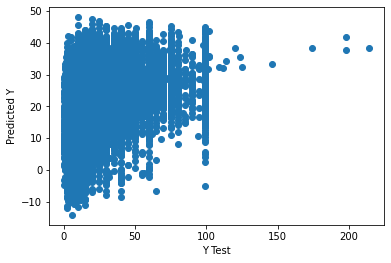

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 11.548330111859542
MSE: 270.0919745496008
RMSE: 16.434475183272536


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


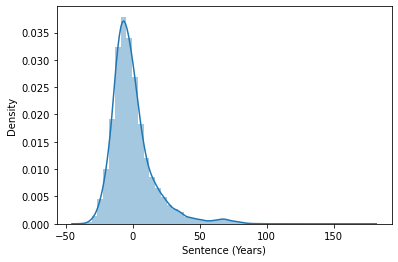

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
reg_pred = reg.predict(X_test)

Text(0, 0.5, 'Predicted Y')

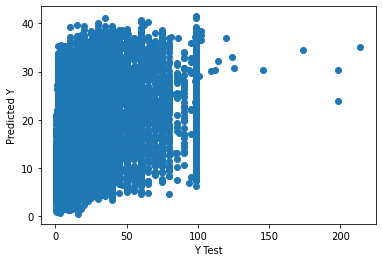

In [ ]:
plt.scatter(y_test,reg_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))

MAE: 10.296438111248705
MSE: 267.03847792329935
RMSE: 16.341312001283722


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


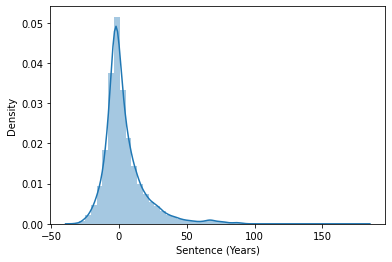

In [ ]:
sns.distplot((y_test-reg_pred),bins=50);